🚀 Starting Q2 flight delay analysis...
📂 Loading CSV...
✅ CSV loaded.
🧹 Data cleaned and prepared.
📊 Plotting average delay per year...


<ipython-input-4-cfcb58ee0ce8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Origin"] = df["Origin"].str.strip().str.upper()
<ipython-input-4-cfcb58ee0ce8>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["FlightDate"].dt.year


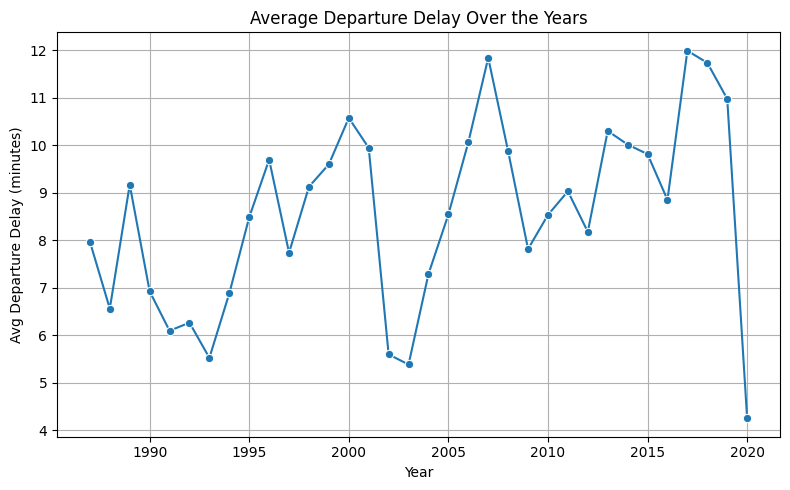

✅ Yearly delay trend plotted.
📦 Calculating airport-level yearly delays...
📈 Plotting airport-level delay trends...


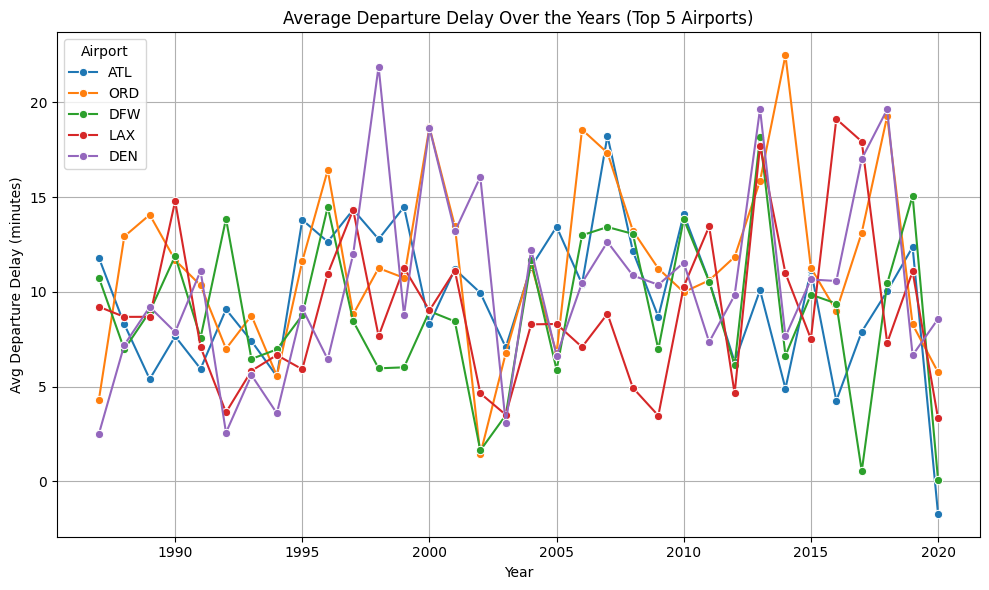

✅ Airport-level delay plot displayed.
📈 Analyzing improvement/decline in performance...

🟢 Top 10 Most Improved Airports (delays reduced):
year       change
Origin           
TPA    -37.400000
CAK    -31.000000
LIT    -27.000000
FLL    -23.250000
PDX    -22.250000
HOU    -21.666667
TRI    -19.000000
ELP    -19.000000
IAH    -18.800000
LGA    -17.014423

🔴 Top 10 Most Declined Airports (delays increased):
year        change
Origin            
MLI     280.000000
MCI      75.916667
CVG      70.071429
CRW      65.000000
ONT      56.000000
SAN      41.000000
SMF      23.000000
RSW      22.500000
SRQ      15.333333
RDU      15.033333
✅ Improvement/decline analysis done.
📊 Plotting trends for top changing airports...


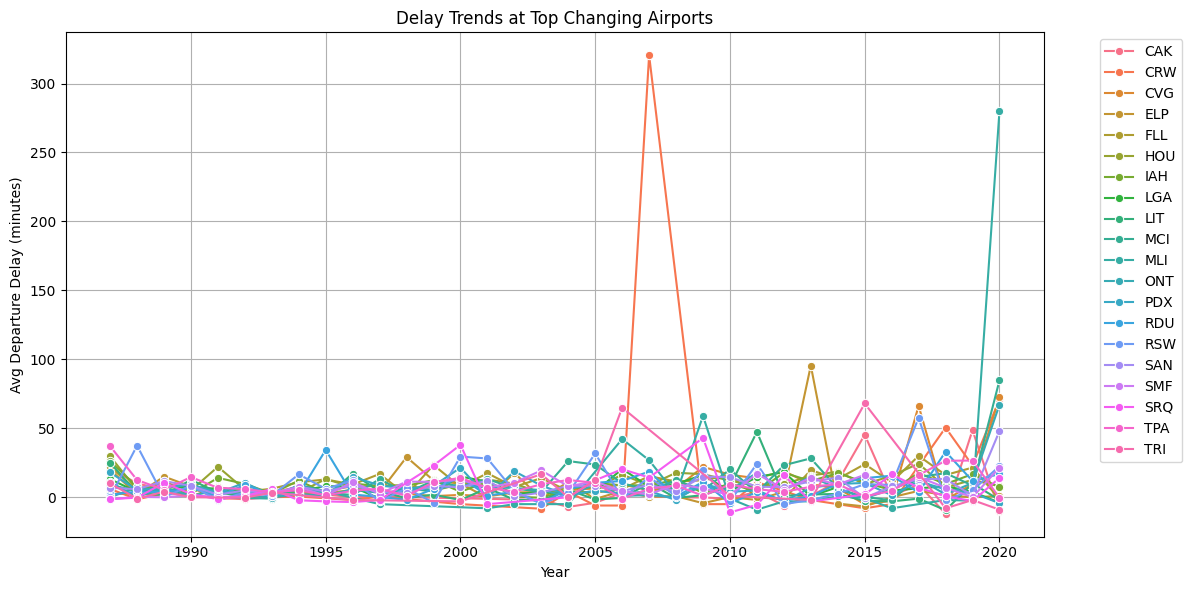

✅ Airport trend plot complete.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🚀 Starting Q2 flight delay analysis...")

# STEP 1: Load and clean the dataset
print("📂 Loading CSV...")
df = pd.read_csv("airline_2m.csv", encoding="ISO-8859-1", parse_dates=["FlightDate"])
print("✅ CSV loaded.")

# Keep only relevant columns
df = df[["FlightDate", "Origin", "DepDelay"]]

# Drop rows with missing delay info
df = df.dropna(subset=["DepDelay"])

# Optional: remove extreme delay values
df = df[(df["DepDelay"] > -60) & (df["DepDelay"] < 1000)]

# Clean airport codes
df["Origin"] = df["Origin"].str.strip().str.upper()

# Extract year from flight date
df["year"] = df["FlightDate"].dt.year
print("🧹 Data cleaned and prepared.")

# ---------------------------------------------
# STEP 2: Average delay across all airports by year
print("📊 Plotting average delay per year...")
avg_delay_by_year = df.groupby("year")["DepDelay"].mean().reset_index()

# Plot overall trend
plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_delay_by_year, x="year", y="DepDelay", marker="o")
plt.title("Average Departure Delay Over the Years")
plt.ylabel("Avg Departure Delay (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()
print("✅ Yearly delay trend plotted.")

# ---------------------------------------------
# STEP 3: Average delay per airport per year
print("📦 Calculating airport-level yearly delays...")
airport_yearly = df.groupby(["Origin", "year"])["DepDelay"].mean().reset_index()
print("📈 Plotting airport-level delay trends...")

# Plotting trends for top 5 busiest airports
top_airports = df["Origin"].value_counts().head(5).index.tolist()
plt.figure(figsize=(10, 6))

for airport in top_airports:
    data = airport_yearly[airport_yearly["Origin"] == airport]
    sns.lineplot(data=data, x="year", y="DepDelay", label=airport, marker="o")

plt.title("Average Departure Delay Over the Years (Top 5 Airports)")
plt.xlabel("Year")
plt.ylabel("Avg Departure Delay (minutes)")
plt.grid(True)
plt.legend(title="Airport")
plt.tight_layout()
plt.show()
print("✅ Airport-level delay plot displayed.")

# ---------------------------------------------
# STEP 4: Identify improvement or decline per airport
print("📈 Analyzing improvement/decline in performance...")

# Pivot to get year columns side by side
pivoted = airport_yearly.pivot(index="Origin", columns="year", values="DepDelay")

# Only keep airports with data in the first and last year
first_year = pivoted.columns.min()
last_year = pivoted.columns.max()
pivoted = pivoted.dropna(subset=[first_year, last_year])

# Calculate change in delay (last year - first year)
pivoted["change"] = pivoted[last_year] - pivoted[first_year]

# Sort to find top improvements and declines
most_improved = pivoted.sort_values("change").head(10)
most_declined = pivoted.sort_values("change", ascending=False).head(10)

# Print results
print("\n🟢 Top 10 Most Improved Airports (delays reduced):")
print(most_improved[["change"]])

print("\n🔴 Top 10 Most Declined Airports (delays increased):")
print(most_declined[["change"]])
print("✅ Improvement/decline analysis done.")

# ---------------------------------------------
# STEP 5: Plot example airport trends
print("📊 Plotting trends for top changing airports...")
top_airports = most_improved.index.tolist() + most_declined.index.tolist()
filtered = airport_yearly[airport_yearly["Origin"].isin(top_airports)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x="year", y="DepDelay", hue="Origin", marker="o")
plt.title("Delay Trends at Top Changing Airports")
plt.ylabel("Avg Departure Delay (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("✅ Airport trend plot complete.")